In [7]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import linear_model
from scipy import stats
from matplotlib import cm
from pathlib import Path
path_noto = Path('../fonts/NotoSansCJKkr-Regular.otf')

from matplotlib import font_manager
# font_manager.fontManager.addfont(path_noto)
plt.rc('font', family='Malgun Gothic')

plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#f5f5f5'
warnings.filterwarnings('ignore')

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']


In [18]:
df = pd.read_csv('./bike.csv', encoding='utf-8-sig')
# df.drop(columns=["운동량", "탄소량", "이동거리(M)"], inplace=True)

In [61]:
# 전처리
df = df.dropna()
df.drop(df[df['연령대'] == '기타'].index, inplace=True)
df['성별'] = df['성별'].str.upper()



## EDA 1

In [1]:
# df.drop(columns=["운동량", "탄소량", "이동거리(M)"], inplace=True)
pie_mem = df.groupby('요금제')['이용건수'].mean()
pie_mem_exp = pie_mem.reset_index() # bike_eda1.csv로 export
print(pie_mem_exp)
fig, ax = plt.subplots()
ax.pie(pie_mem, labels=pie_mem.index)
ax.set_title("요금제별 평균 이용건수", font=path_noto, fontsize=20, x=0.6)
plt.show()

NameError: name 'df' is not defined

In [54]:
filepath = Path('./bike_eda1.csv')
exp = df.drop(columns=['운동량', '탄소량', '이동거리(M)'])
pie_mem_exp.to_csv(filepath, index=False, encoding="utf-8-sig")

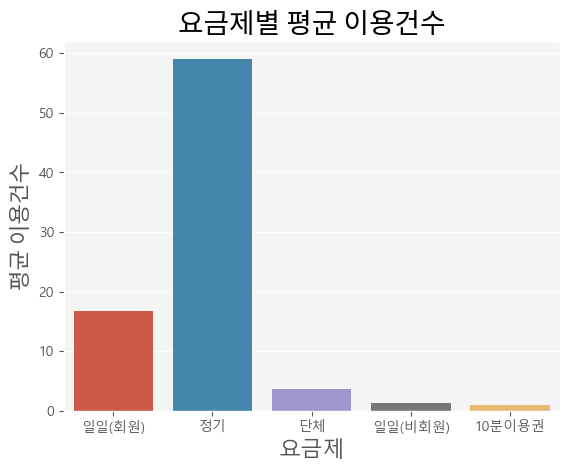

In [55]:
fig, ax = plt.subplots()

ax = sns.barplot(data=exp, x='요금제', y='이용건수', ci=None)
ax.set_title("요금제별 평균 이용건수", font=path_noto, fontsize=20)
ax.set_ylabel("평균 이용건수", font=path_noto, fontsize=16)
ax.set_xlabel("요금제", fontsize=16)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax = sns.lineplot(data=exp, x='요금제', y='이용건수', ci=None)
ax.set_title("요금제별 평균 이용건수", font=path_noto, fontsize=20)
ax.set_ylabel("평균 이용건수", font=path_noto, fontsize=16)
ax.set_xlabel("요금제", fontsize=16)
plt.show()

## EDA 2 & 3

         이용건수   1건당 이용시간
성별                      
F   31.304044  30.030200
M   42.984368  27.232428


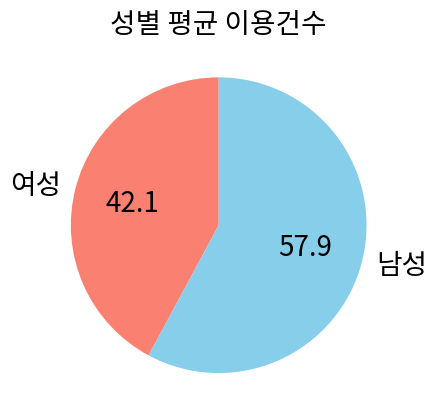

In [105]:
pie_eda2 = df.groupby('성별')[['이용건수', '1건당 이용시간']].mean()
print(pie_eda2)

def absolute_value(val):
    a  = np.round(val/100.*pie_eda2['1건당 이용시간'].sum(), 0)
    return a

plt.title("성별 평균 이용건수", font=path_noto, fontsize=20)
plt.pie(pie_eda2['이용건수'].values, labels=['여성', '남성'], startangle=90, autopct='%.1f', colors=['salmon', 'skyblue'], textprops={'font':path_noto, 'fontsize':20})
plt.show()

In [89]:
filepath = Path('./bike_eda2.csv')
pie_eda2_exp = df.groupby('성별')[['이용건수', '1건당 이용시간']].sum()
# print(pie_eda2_exp.head())
# print(df['성별'].value_counts())

pie_eda2_exp['총 인원'] = df['성별'].value_counts().values
pie_eda2_exp.columns = ['이용건수 총계', '1건당 이용시간 총계', '총 인원']
pie_eda2_exp.head()
pie_eda2_exp.to_csv(filepath, index=False, encoding="utf-8-sig")

## EDA 4

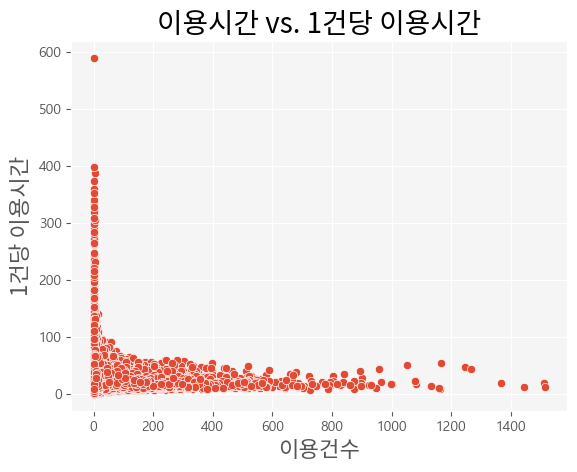

In [107]:
fig, ax = plt.subplots()

ax = sns.scatterplot(data=df, x='이용건수', y='1건당 이용시간')
ax.set_title("이용시간 vs. 1건당 이용시간", font=path_noto, fontsize=20)
ax.set_xlabel("이용건수", font=path_noto, fontsize=16)
ax.set_ylabel("1건당 이용시간", font=path_noto, fontsize=16)
plt.show()

## EDA 5 & 6

In [130]:
df_age = df.sort_values(by='연령대')
df_age_grouped = df_age.groupby('연령대')['1건당 이용시간'].sum().reset_index()
df_age_grouped.columns=['연령대', '1건당 이용시간 총계']
df_age_grouped['총 인원'] = df_age['연령대'].value_counts().reset_index().sort_values(by='index')['연령대'].values
df_age_grouped['1건당 이용시간 총계'] = df_age_grouped['1건당 이용시간 총계'].astype(int)
df_age_grouped

,연령대,1건당 이용시간 총계,총 인원
0,10대,282859,11149
1,20대,303985,12089
2,30대,324175,11669
3,40대,387308,12034
4,50대,304115,9775
5,60대,205449,6637
6,70대이상,80670,2778


In [125]:
df_age_mean = df_age.groupby('연령대')['1건당 이용시간'].mean().reset_index()
df_age['연령대'].value_counts().reset_index().sort_values(by='index')['연령대']

3    11149
0    12089
2    11669
1    12034
4     9775
5     6637
6     2778
Name: 연령대, dtype: int64

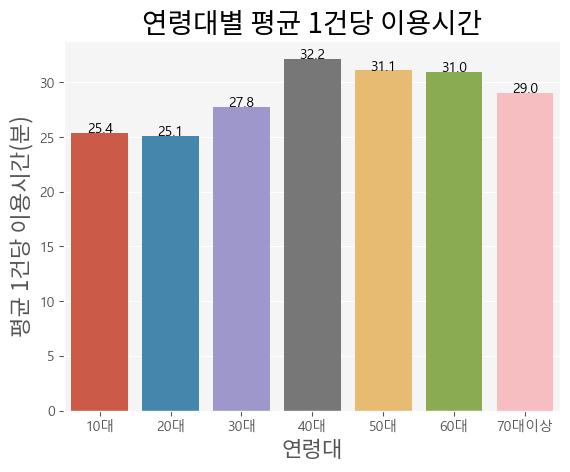

In [212]:
fig, ax = plt.subplots()

ax = sns.barplot(data=df_age_mean, x='연령대', y='1건당 이용시간', ci=None)
ax.set_title('연령대별 평균 1건당 이용시간', font=path_noto, fontsize=20)
ax.set_xlabel('연령대', font=path_noto, fontsize=16)
ax.set_ylabel('평균 1건당 이용시간(분)', font=path_noto, fontsize=16)

# for i in ax.containers:
#     ax.bar_label(tmp)

for index, row in df_age_mean.iterrows():
    ax.text(row.name, row['1건당 이용시간'], round(row['1건당 이용시간'], 1), color='black', ha='center')

plt.show()

In [131]:
filepath = Path('./bike_eda5.csv')
df_age_grouped.to_csv(filepath, index=False, encoding="utf-8-sig")

In [213]:
df_age_mean

,연령대,1건당 이용시간
0,10대,25.370846
1,20대,25.145627
2,30대,27.780932
3,40대,32.184548
4,50대,31.111518
5,60대,30.955167
6,70대이상,29.039087
